In [15]:
import pandas

## read data (export from RDP5)

In [16]:
df = pandas.read_csv('simplot2.csv')
df

,Position in alignment,reference_spike - WIV1_spike,reference_spike - Tor2_spike,reference_spike - RF1_spike,reference_spike - ZC45_spike
0,20,0.529710,0.663035,0.532229,0.335564
1,40,0.558249,0.705120,0.578333,0.368240
2,60,0.618489,0.754417,0.663972,0.451589
3,80,0.710925,0.837292,0.769783,0.573816
4,100,0.779773,0.877742,0.857556,0.665652
...,...,...,...,...,...
185,3720,0.226965,0.226965,0.308484,0.144968
186,3740,0.230945,0.220090,0.301970,0.149236
187,3760,0.243552,0.236853,0.319241,0.167922
188,3780,0.270666,0.268460,0.341707,0.193918


In [17]:
colnames = df.columns.tolist()

In [18]:
import matplotlib.pyplot as plt

In [19]:
colnames = df.columns.tolist()
colnames

['Position in alignment',
 'reference_spike - WIV1_spike',
 'reference_spike - Tor2_spike',
 'reference_spike - RF1_spike',
 'reference_spike - ZC45_spike']

## converting distance to similarity

In [20]:

for i in range(1, len(colnames)):
    
    dists = df[colnames[i]].tolist() 
    simps = []
    for j in range(len(dists)):    
        simps.append(1 - dists[j])
        
    df[colnames[i]] = simps
    
        

In [21]:
df

,Position in alignment,reference_spike - WIV1_spike,reference_spike - Tor2_spike,reference_spike - RF1_spike,reference_spike - ZC45_spike
0,20,0.470290,0.336965,0.467771,0.664436
1,40,0.441751,0.294880,0.421667,0.631760
2,60,0.381511,0.245583,0.336028,0.548411
3,80,0.289075,0.162708,0.230217,0.426184
4,100,0.220227,0.122258,0.142444,0.334348
...,...,...,...,...,...
185,3720,0.773035,0.773035,0.691516,0.855032
186,3740,0.769055,0.779910,0.698030,0.850764
187,3760,0.756448,0.763147,0.680759,0.832078
188,3780,0.729334,0.731540,0.658293,0.806082


In [22]:
p_df = pandas.read_csv("p_val.csv")
p_df.columns = [i.strip() for i in p_df.columns]
p_df = p_df.loc[p_df["Recombinant"] == "reference_spike",:].sort_values(by="Start in Alignmnet")
p_df.reset_index(inplace=True)
p_df

,index,Recombination Event Number,Method,Recombinant,Minor Parent,Major Parent,Start in Alignmnet,End in Alignment,Best P-Value,Distance
0,5,6,RDP,reference_spike,RF1_spike,Tor2_spike,1025,1133,0.002842,0.753721
1,7,8,RDP,reference_spike,WIV1_spike,ZC45_spike,1385,1613,0.014170,0.742301
2,2,3,RDP,reference_spike,WIV1_spike,ZC45_spike,1930,2238,0.000050,0.742301
3,9,10,RDP,reference_spike,Tor2_spike,ZC45_spike,2630,2676,0.036973,0.735064
4,3,4,RDP,reference_spike,WIV1_spike,ZC45_spike,3591,3744,0.000280,0.742301


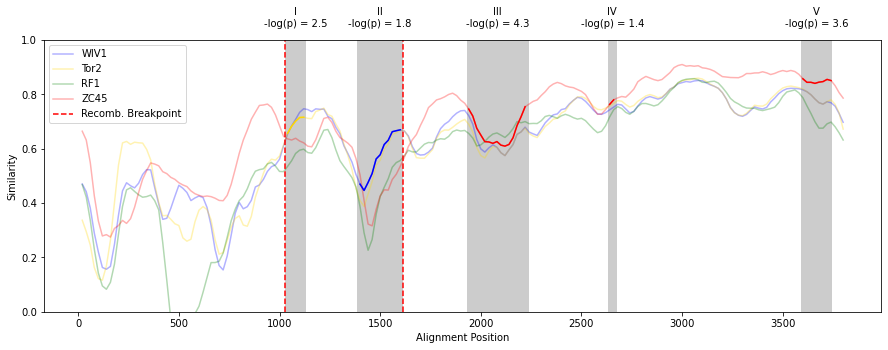

In [23]:
from matplotlib import patches
import numpy as np
fig,ax = plt.subplots(figsize=(15,5))
# ax.set_facecolor((0.2, 0.2, 0.2))
ax.set_ylim([0, 1])
ax.set_ylabel("Similarity")
ax.set_xlabel("Alignment Position")

colors = {"WIV1_spike":"blue","Tor2_spike":"gold","RF1_spike":"green","ZC45_spike":"red"}
roman = {1:"I",2:"II",3:"III",4:"IV",5:"V"}

for column in df.columns[1:]:
    k = column.split("-")[-1].strip()
    color = colors[k]
    k = k.replace("_"," ").split(" ")[0]
    ax.plot(df["Position in alignment"],df[column],c=color,alpha=0.3,label=k)
        
    
for i,row in p_df.iterrows():
    ax_df = df.loc[(df["Position in alignment"] >= row["Start in Alignmnet"]) & (df["Position in alignment"] <= row["End in Alignment"]),:]
    
    minp = ax_df[f"{row['Recombinant']} - {row['Minor Parent']}"]
    majp = ax_df[f"{row['Recombinant']} - {row['Major Parent']}"]
    y = []
    color = 'k'
    if sum(majp) > sum(minp):
        y = majp
        color = colors[row["Major Parent"]]
    else:
        y = minp
        color = colors[row["Minor Parent"]]    
    
    # color = colors[row["Major Parent"]]
    
    ax.add_patch(patches.Rectangle((row["Start in Alignmnet"],0),row["End in Alignment"]-row["Start in Alignmnet"],1,facecolor="k",alpha=0.2))
    
    ax.plot(ax_df["Position in alignment"],y,c=color)
    # ax.plot(ax_df["Position in alignment"],ax_df[f"{row['Recombinant']} - {row['Major Parent']}"],c=color)
    mid_point = np.mean([row["Start in Alignmnet"],row["End in Alignment"]])
    n_10p = -np.log10(row["Best P-Value"])
    fmt = f"{roman[i+1]}\n-log(p) = {n_10p:.1f}"
    ax.text(mid_point,1.05,fmt,ha="center")

plt.axvline(1025,  label='Recomb. Breakpoint', c='r', linestyle='dashed',alpha=1);
plt.axvline(1613, c='r', linestyle='dashed', alpha=1);
ax.legend(loc="upper left")
plt.show()